# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estará distribuído según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)
type(x)

numpy.ndarray

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 0.3 * x # predicion
type(y_pred)

numpy.ndarray

In [5]:
y_act = 5 + 0.3 * x + res
type(y_act)

numpy.ndarray

In [6]:
# CONVERTIMOS A LISTAS LOS ARRAYS
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()
type(y_act_list)

list

In [7]:
# CREAMOS EL DATA SET
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [8]:
data.head()

,x,y_actual,y_prediccion
0,-3.860789,4.577840,3.841763
1,4.692361,7.289246,6.407708
2,4.488655,6.945337,6.346596
3,4.564965,6.300091,6.369490
4,0.557638,5.852024,5.167292


In [9]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Valor Actual vs Predicción')

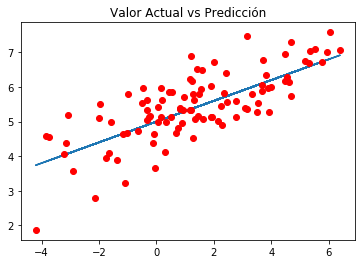

In [10]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act, "ro")
plt.title("Valor Actual vs Predicción")

In [11]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

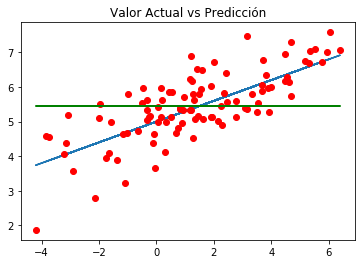

In [12]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act, "ro")
plt.plot(x,y_mean, "g")
plt.title("Valor Actual vs Predicción")

Text(0.5, 1.0, 'Valor Actual vs Predicción')

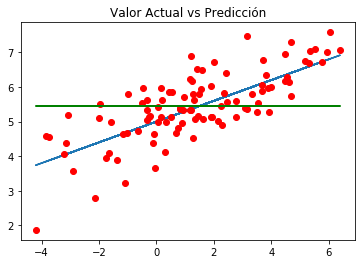

In [13]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

## ¿Como es la predicción de buena?
* **SST** = SSD + SSR
* **SST** : Variabilidad de los datos con respecto de su media
* **SSD** : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* **SSR** : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* **R2** = SSR / SST, coeficiente de determinación entre 0 y 1

In [14]:
y_m = np.mean(y_act)
data["SSR"]=(data["y_prediccion"]-y_m)**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-y_m)**2

In [15]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,-3.860789,4.577840,3.841763,2.623740,0.541809,0.780960
1,4.692361,7.289246,6.407708,0.895198,0.777109,3.340439
2,4.488655,6.945337,6.346596,0.783290,0.358490,2.201595
3,4.564965,6.300091,6.369490,0.824337,0.004816,0.703135
4,0.557638,5.852024,5.167292,0.086594,0.468858,0.152462


In [16]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [17]:
SSR

53.68273990115039

In [18]:
SSD

43.328602655732

In [19]:
SST

98.10555494055363

In [20]:
SSR+SSD

97.0113425568824

In [21]:
R2 = SSR/SST

In [22]:
R2

0.5471936826989977

(array([ 2., 10., 13., 17., 21., 17., 13.,  3.,  2.,  2.]),
 array([-1.53788084, -1.19693536, -0.85598989, -0.51504441, -0.17409893,
         0.16684655,  0.50779202,  0.8487375 ,  1.18968298,  1.53062845,
         1.87157393]),
 <a list of 10 Patch objects>)

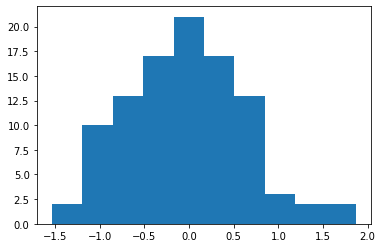

In [23]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Ejercicio demostrar que SST = SSR + SSD

Vamos a demostrar formalmente la igualdad SST = SSR + SSD que hemos estado utilizando en la teoría de los vídeos anteriores.
Utilizando la notación del ejercicio anterior, es decir:

* **y_i** = el valor actual i-ésimo

* **y_m** = media de los valores actuales

* **z_i** = valor predictor i-ésimo (el que nos da la recta de regresión).

Podemos escribir

```python
y_i - y_m = (y_i - z_i) + (z_i - y_m)
```

Y si ahora elevamos al cuadrado, y aplicamos la identidad notable obtenemos que :

```python
(y_i - y_m) ^2 = (y_i - z_i) ^2 + (z_i-y_m) ^2 + 2(y_i-z_i)(z_i-y_m)
```
De aquí, aplicando sumatorio a cada uno de los factores anteriores se deduce que para demostrar que **SST = SSR + SSD**, tenemos que probar que:
```python
sum(y_i-z_i)(z_i-y_m) = 0
```
Notemos que podemos obviar el 2 porque.

Para ello expresamos  **(y_i-z_i)(z_i-y_m)** de la siguiente forma:
```python
(y_i-z_i)(z_i-y_m) =(y_i-z_i)z_i - (y_i-z_i)y_m
```
Ahora bien, en la demostración que  hicimos en el vídeo de la clase 74, la primera ecuación normal (en el minuto 5:26) vemos que:
```python
sum(y_i-z_i)=0
```
Por lo tanto será suficiente ver que
```python
sum(y_i-z_i)z_i = 0
```
Para ello, basta escribir que es z_i, no es otra cosa que:
```python
z_i = a + bx_i
```
y si entonces sustituimos en la suma anterior y operamos, tenemos que:
```python
sum(y_i-z_i)z_i = sum(y_i-z_i)a + bsum(y_i-z_i)x_i
```
De nuevo el primer sumatorio es cero por la primera ecuación. El segundo sumatorio también es cero por la segunda ecuación normal que aparece en el minuto 5:26 de vídeo.

## Obteniendo la recta de regresión 

* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [24]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.3135244039038831, 5.4615595526971665)

In [25]:
# b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean) # ==> ((xi - x_m)*(y_i-y_m))
data["beta_d"] = (data["x"]-x_mean)**2 # ==> ((xi-x_m)^2)

In [26]:
# b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [27]:
# a = y_m - b * x_m
alpha = y_mean - beta * x_mean

In [28]:
alpha, beta

(5.0600784652162485, 0.3056517916893582)

El modelo lineal obtenido por regresión es:
y = 5.042341442370516 + 1.9044490309709992 * x

In [29]:
data["y_model"] = alpha + beta * data["x"]

In [30]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,-3.860789,4.577840,3.841763,2.623740,0.541809,0.780960,4.572642,26.773518,3.880021
1,4.692361,7.289246,6.407708,0.895198,0.777109,3.340439,6.175456,11.416538,6.494307
2,4.488655,6.945337,6.346596,0.783290,0.358490,2.201595,4.711186,10.081451,6.432044
3,4.564965,6.300091,6.369490,0.824337,0.004816,0.703135,2.726435,10.571868,6.455368
4,0.557638,5.852024,5.167292,0.086594,0.468858,0.152462,-0.295146,0.571364,5.230522


In [31]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [32]:
SSR, SSD, SST

(55.25149873786439, 42.85405620268925, 98.10555494055363)

In [33]:
R2 = SSR / SST
R2

0.5631842026819343

Text(0.5, 1.0, 'Valor Actual vs Predicción')

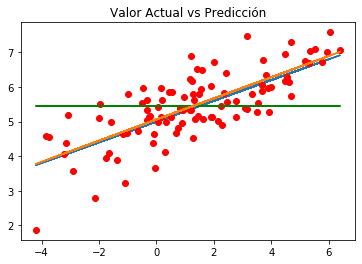

In [34]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [35]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.6612762567811907

In [36]:
np.mean(data["y_actual"])

5.4615595526971665

In [37]:
RSE / np.mean(data["y_actual"])

0.12107828366617782